In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [23]:
# Import Iris dataset from sklearn
from sklearn import datasets

iris = datasets.load_iris()

# Create a dataframe
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['iris'] = iris.target

data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# 🪴
The updated version of Iris datset is label encoded. The "Iris" column is encoded as 0,1 and 2.

In [24]:
# split data
from sklearn.model_selection import train_test_split
x = data.drop('iris', axis=1)
y = data['iris']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

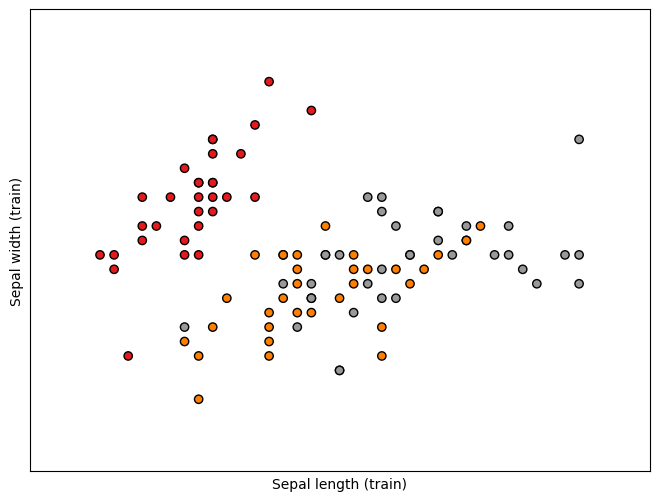

In [25]:
# 2D visualization

# Scatter plot
plt.figure(figsize=(8, 6))
plt.clf()

# # Plot the training points
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length (train)')
plt.ylabel('Sepal width (train)')

# Set axis limits
x_min, x_max = x_train.iloc[:, 0].min() - .5, x_train.iloc[:, 0].max() + .5
y_min, y_max = x_train.iloc[:, 1].min() - .5, x_train.iloc[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Remove axis ticks
plt.xticks(())
plt.yticks(())

plt.show()


<ipython-input-26-735b3bec040d>:12: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-26-735b3bec040d>:14: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-26-735b3bec040d>:16: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


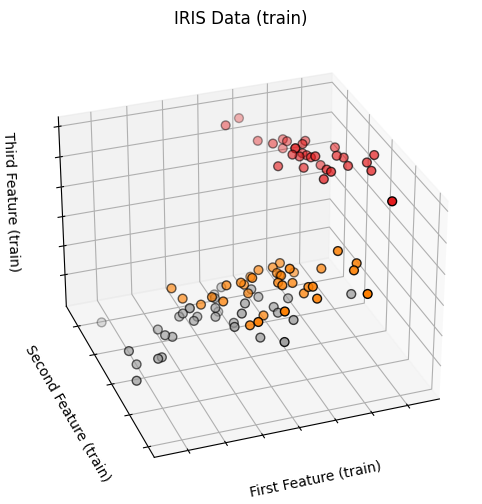

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# 3D visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

ax.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], x_train.iloc[:, 2], c=y_train,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("IRIS Data (train)")
ax.set_xlabel("First Feature (train)")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Second Feature (train)")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Third Feature (train)")
ax.w_zaxis.set_ticklabels([])

plt.show()


In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Model and layers
model = Sequential([
    Dense(units=4, input_shape=(4,), activation='relu'),
    Dense(units=8, activation='relu'),  # Additional hidden layer
    Dense(units=3, activation='softmax')
])

# Loss funciton
from tensorflow.keras.losses import SparseCategoricalCrossentropy
loss = SparseCategoricalCrossentropy()

# Optimizer
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

# Compile model
model.compile(optimizer=optimizer, loss= loss , metrics=['accuracy'])

# Train Data
history = model.fit(x_train, y_train, epochs=150, validation_data = (x_test, y_test))


Epoch 1/150
4/4 [==============================] - 2s 73ms/step - loss: 1.5851 - accuracy: 0.6600 - val_loss: 1.4472 - val_accuracy: 0.6800
Epoch 2/150
4/4 [==============================] - 0s 12ms/step - loss: 1.4771 - accuracy: 0.6600 - val_loss: 1.3536 - val_accuracy: 0.6800
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 1.3831 - accuracy: 0.6600 - val_loss: 1.2708 - val_accuracy: 0.6800
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 1.2886 - accuracy: 0.6500 - val_loss: 1.2028 - val_accuracy: 0.6800
Epoch 5/150
4/4 [==============================] - 0s 17ms/step - loss: 1.2207 - accuracy: 0.6500 - val_loss: 1.1501 - val_accuracy: 0.6200
Epoch 6/150
4/4 [==============================] - 0s 18ms/step - loss: 1.1652 - accuracy: 0.6300 - val_loss: 1.1153 - val_accuracy: 0.5600
Epoch 7/150
4/4 [==============================] - 0s 18ms/step - loss: 1.1264 - accuracy: 0.4700 - val_loss: 1.0911 - val_accuracy: 0.4400
Epoch 8/150
4/4 [===

# Evaluate Model

In [33]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

2/2 [==============================] - 0s 8ms/step - loss: 0.3654 - accuracy: 0.9600
Loss: 0.3653639853000641, Accuracy: 0.9599999785423279


# Visualize loss and accuracy

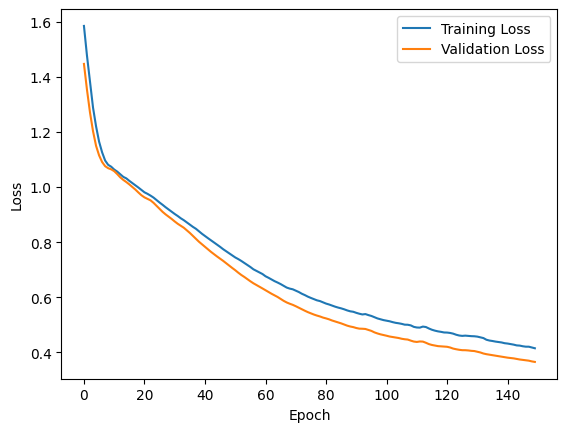

In [34]:
# Visualize training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

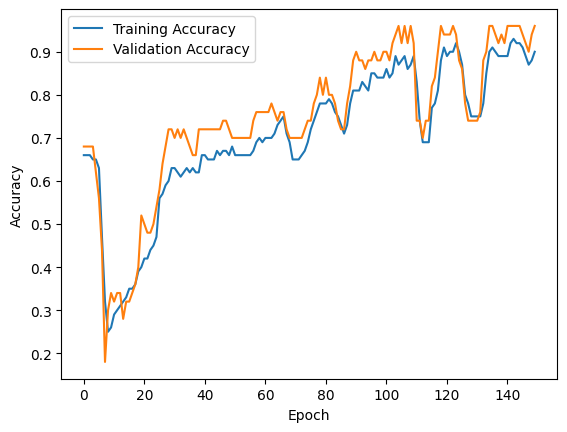

In [35]:
# Visualize training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()